In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL

from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import optimizers, losses, callbacks
from keras.models import Sequential
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split

In [3]:
data_dir= '../input/flowers-recognition/flowers/flowers'

In [4]:
batch_size=32
img_height= 180
img_width= 180

train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.
Found 4323 files belonging to 5 classes.
Using 864 files for validation.


In [5]:
# # test_ds = image_dataset_from_directory(
# #   data_dir,
# #   validation_split=0.2,
# #   subset="validation",
# #   seed=12,
# #   image_size=(img_height, img_width),
# #   batch_size=batch_size)

# tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir, labels='inferred', label_mode='int',
#     class_names=None, color_mode='rgb', batch_size=32, image_size=(img_height,
#     img_width), shuffle=True, seed=12,
#     interpolation='bilinear'
# )

In [6]:
class_names= train_ds.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [7]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [8]:
# Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

In [9]:
# Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

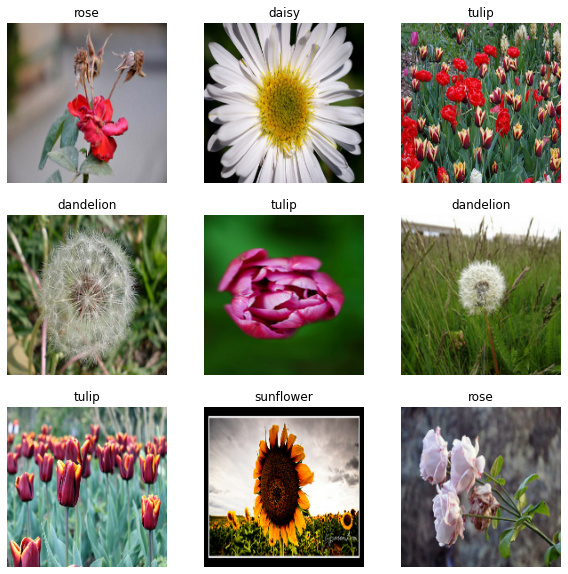

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [14]:
num_classes = 5
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [16]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)


In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 93s 617ms/step - loss: 1.5252 - accuracy: 0.3535 - val_loss: 1.1397 - val_accuracy: 0.5428
Epoch 2/10
109/109 [==============================] - 62s 568ms/step - loss: 0.9973 - accuracy: 0.6021 - val_loss: 0.9478 - val_accuracy: 0.6169
Epoch 3/10
109/109 [==============================] - 62s 571ms/step - loss: 0.8111 - accuracy: 0.6850 - val_loss: 0.9700 - val_accuracy: 0.6238
Epoch 4/10
109/109 [==============================] - 62s 565ms/step - loss: 0.5939 - accuracy: 0.7938 - val_loss: 1.0982 - val_accuracy: 0.6204
Epoch 5/10
109/109 [==============================] - 62s 569ms/step - loss: 0.3442 - accuracy: 0.8772 - val_loss: 1.1881 - val_accuracy: 0.6319
Epoch 6/10
109/109 [==============================] - 62s 573ms/step - loss: 0.1934 - accuracy: 0.9403 - val_loss: 1.4505 - val_accuracy: 0.6377
Epoch 7/10
109/109 [==============================] - 62s 569ms/step - loss: 0.0867 - accuracy: 0.9767 - val_loss: 1.6341 - val_ac

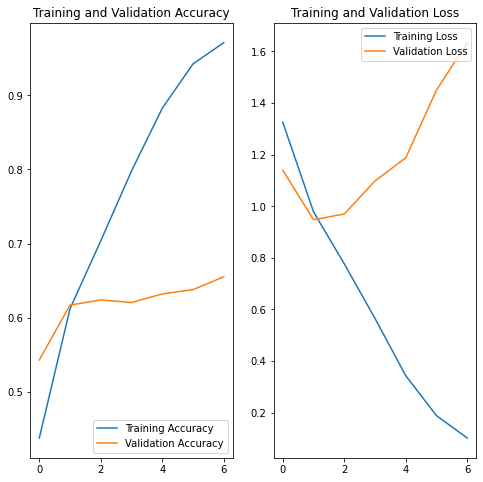

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
num_classes = 5
model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model2.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [21]:
from keras.callbacks import EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)


In [22]:
epochs=10
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 139s 1s/step - loss: 1.5313 - accuracy: 0.3636 - val_loss: 1.1531 - val_accuracy: 0.5127
Epoch 2/10
109/109 [==============================] - 137s 1s/step - loss: 1.0194 - accuracy: 0.5976 - val_loss: 1.0678 - val_accuracy: 0.5729
Epoch 3/10
109/109 [==============================] - 137s 1s/step - loss: 0.8718 - accuracy: 0.6619 - val_loss: 0.9621 - val_accuracy: 0.6204
Epoch 4/10
109/109 [==============================] - 138s 1s/step - loss: 0.6082 - accuracy: 0.7694 - val_loss: 1.0361 - val_accuracy: 0.6470
Epoch 5/10
109/109 [==============================] - 139s 1s/step - loss: 0.3988 - accuracy: 0.8521 - val_loss: 1.1541 - val_accuracy: 0.6343
Epoch 6/10
109/109 [==============================] - 138s 1s/step - loss: 0.2283 - accuracy: 0.9254 - val_loss: 1.2968 - val_accuracy: 0.6470
Epoch 7/10
109/109 [==============================] - 138s 1s/step - loss: 0.1332 - accuracy: 0.9609 - val_loss: 1.6079 - val_accuracy: 0.6470

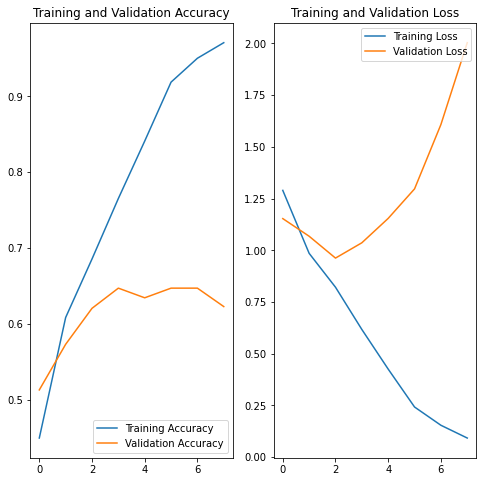

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
num_classes = 5
model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),layers.Dropout(0.02),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [25]:
model3.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [26]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [27]:
epochs=10
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 65s 595ms/step - loss: 1.5221 - accuracy: 0.3521 - val_loss: 1.0854 - val_accuracy: 0.5613
Epoch 2/10
109/109 [==============================] - 65s 595ms/step - loss: 0.9871 - accuracy: 0.6183 - val_loss: 1.0963 - val_accuracy: 0.5660
Epoch 3/10
109/109 [==============================] - 63s 581ms/step - loss: 0.8472 - accuracy: 0.6672 - val_loss: 0.9404 - val_accuracy: 0.6389
Epoch 4/10
109/109 [==============================] - 63s 579ms/step - loss: 0.6157 - accuracy: 0.7670 - val_loss: 1.0234 - val_accuracy: 0.6435
Epoch 5/10
109/109 [==============================] - 63s 574ms/step - loss: 0.4217 - accuracy: 0.8419 - val_loss: 1.0980 - val_accuracy: 0.6435
Epoch 6/10
109/109 [==============================] - 63s 580ms/step - loss: 0.2440 - accuracy: 0.9126 - val_loss: 1.2646 - val_accuracy: 0.6528
Epoch 7/10
109/109 [==============================] - 62s 574ms/step - loss: 0.1213 - accuracy: 0.9661 - val_loss: 1.6430 - val_ac

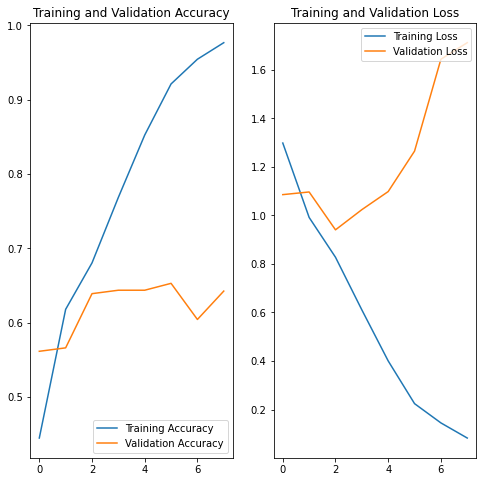

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
num_classes = 5
model4 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.02),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model4.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [31]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [32]:
epochs=10
history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 72s 655ms/step - loss: 1.4200 - accuracy: 0.3694 - val_loss: 1.1473 - val_accuracy: 0.4757
Epoch 2/10
109/109 [==============================] - 71s 652ms/step - loss: 1.0298 - accuracy: 0.5816 - val_loss: 1.0090 - val_accuracy: 0.5868
Epoch 3/10
109/109 [==============================] - 76s 698ms/step - loss: 0.8456 - accuracy: 0.6670 - val_loss: 0.9720 - val_accuracy: 0.6273
Epoch 4/10
109/109 [==============================] - 76s 698ms/step - loss: 0.7874 - accuracy: 0.6902 - val_loss: 0.8216 - val_accuracy: 0.6655
Epoch 5/10
109/109 [==============================] - 76s 701ms/step - loss: 0.6175 - accuracy: 0.7653 - val_loss: 0.8546 - val_accuracy: 0.6759
Epoch 6/10
109/109 [==============================] - 77s 705ms/step - loss: 0.4781 - accuracy: 0.8210 - val_loss: 1.0262 - val_accuracy: 0.6644
Epoch 7/10
109/109 [==============================] - 76s 701ms/step - loss: 0.2749 - accuracy: 0.9069 - val_loss: 1.0757 - val_ac

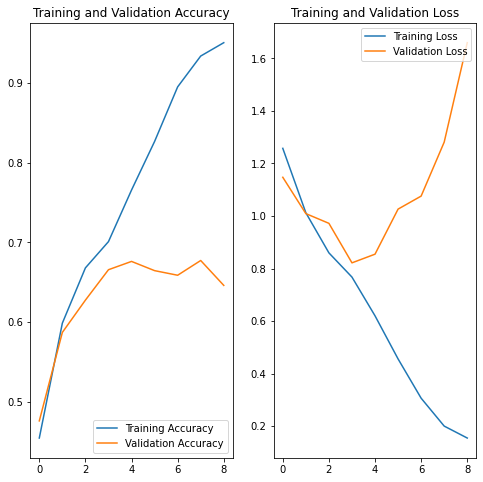

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
num_classes = 5
model5 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.02),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [35]:
model5.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [36]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [37]:
epochs=10
history = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 88s 802ms/step - loss: 1.5113 - accuracy: 0.3171 - val_loss: 1.0867 - val_accuracy: 0.5694
Epoch 2/10
109/109 [==============================] - 87s 794ms/step - loss: 1.0619 - accuracy: 0.5665 - val_loss: 1.0580 - val_accuracy: 0.5648
Epoch 3/10
109/109 [==============================] - 86s 792ms/step - loss: 0.9260 - accuracy: 0.6285 - val_loss: 0.8617 - val_accuracy: 0.6528
Epoch 4/10
109/109 [==============================] - 87s 798ms/step - loss: 0.7722 - accuracy: 0.6918 - val_loss: 0.9609 - val_accuracy: 0.6493
Epoch 5/10
109/109 [==============================] - 88s 811ms/step - loss: 0.7298 - accuracy: 0.7276 - val_loss: 0.8609 - val_accuracy: 0.6725
Epoch 6/10
109/109 [==============================] - 87s 802ms/step - loss: 0.6543 - accuracy: 0.7509 - val_loss: 0.8380 - val_accuracy: 0.6771
Epoch 7/10
109/109 [==============================] - 81s 740ms/step - loss: 0.5912 - accuracy: 0.7668 - val_loss: 0.7464 - val_ac

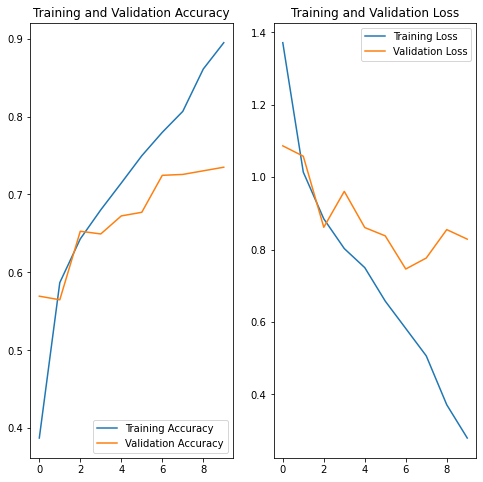

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
num_classes = 5
model6 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.02),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Dropout(0.02),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
model6.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [41]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [42]:
epochs=10
history = model6.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 74s 671ms/step - loss: 1.4879 - accuracy: 0.3312 - val_loss: 1.2174 - val_accuracy: 0.4861
Epoch 2/10
109/109 [==============================] - 72s 664ms/step - loss: 1.0933 - accuracy: 0.5697 - val_loss: 1.0100 - val_accuracy: 0.5810
Epoch 3/10
109/109 [==============================] - 73s 669ms/step - loss: 0.8897 - accuracy: 0.6590 - val_loss: 1.0891 - val_accuracy: 0.5810
Epoch 4/10
109/109 [==============================] - 72s 666ms/step - loss: 0.8281 - accuracy: 0.6683 - val_loss: 0.8755 - val_accuracy: 0.6597
Epoch 5/10
109/109 [==============================] - 72s 665ms/step - loss: 0.6256 - accuracy: 0.7702 - val_loss: 0.8693 - val_accuracy: 0.6609
Epoch 6/10
109/109 [==============================] - 72s 662ms/step - loss: 0.5135 - accuracy: 0.8122 - val_loss: 0.9391 - val_accuracy: 0.6759
Epoch 7/10
109/109 [==============================] - 73s 666ms/step - loss: 0.3575 - accuracy: 0.8697 - val_loss: 1.0282 - val_ac

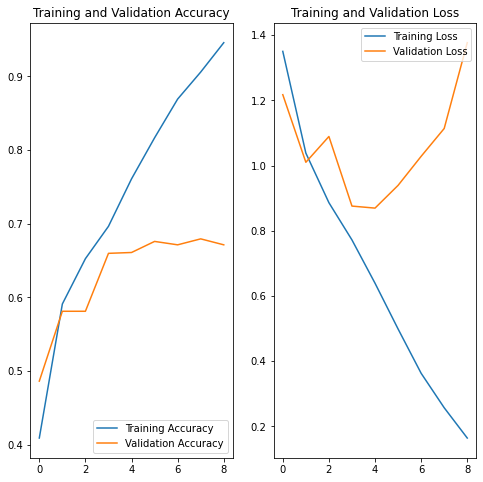

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
num_classes = 5
model7 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Dropout(0.02),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [45]:
model7.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [46]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [47]:
epochs=10
history = model7.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 42s 383ms/step - loss: 1.5512 - accuracy: 0.3344 - val_loss: 1.1018 - val_accuracy: 0.5405
Epoch 2/10
109/109 [==============================] - 42s 385ms/step - loss: 1.0630 - accuracy: 0.5763 - val_loss: 1.0025 - val_accuracy: 0.6076
Epoch 3/10
109/109 [==============================] - 42s 386ms/step - loss: 0.8890 - accuracy: 0.6512 - val_loss: 0.9505 - val_accuracy: 0.6296
Epoch 4/10
109/109 [==============================] - 42s 383ms/step - loss: 0.7755 - accuracy: 0.7008 - val_loss: 1.0797 - val_accuracy: 0.6053
Epoch 5/10
109/109 [==============================] - 42s 383ms/step - loss: 0.6353 - accuracy: 0.7635 - val_loss: 0.9882 - val_accuracy: 0.6146
Epoch 6/10
109/109 [==============================] - 42s 384ms/step - loss: 0.4844 - accuracy: 0.8270 - val_loss: 1.0833 - val_accuracy: 0.6343
Epoch 7/10
109/109 [==============================] - 42s 388ms/step - loss: 0.2902 - accuracy: 0.9011 - val_loss: 1.1074 - val_ac

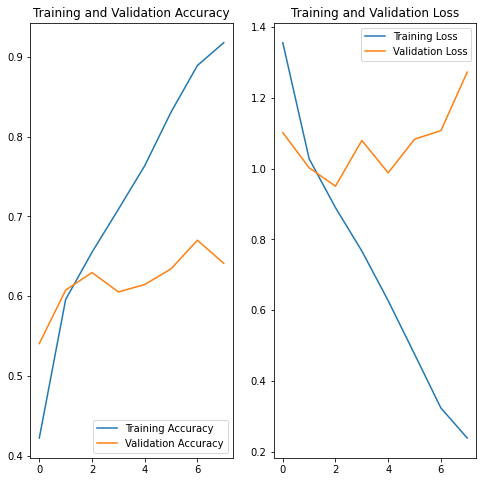

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
num_classes = 5
model8 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.02),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.02),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [50]:
model8.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [51]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [52]:
epochs=10
history = model8.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 92s 835ms/step - loss: 1.4635 - accuracy: 0.3117 - val_loss: 1.1633 - val_accuracy: 0.5104
Epoch 2/10
109/109 [==============================] - 90s 830ms/step - loss: 1.1114 - accuracy: 0.5430 - val_loss: 0.9910 - val_accuracy: 0.5810
Epoch 3/10
109/109 [==============================] - 90s 829ms/step - loss: 0.9515 - accuracy: 0.6288 - val_loss: 0.9205 - val_accuracy: 0.6366
Epoch 4/10
109/109 [==============================] - 90s 825ms/step - loss: 0.8519 - accuracy: 0.6648 - val_loss: 0.8196 - val_accuracy: 0.6748
Epoch 5/10
109/109 [==============================] - 89s 821ms/step - loss: 0.7288 - accuracy: 0.7250 - val_loss: 0.8157 - val_accuracy: 0.6852
Epoch 6/10
106/109 [============================>.] - ETA: 2s - loss: 0.6974 - accuracy: 0.7417

KeyboardInterrupt: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
num_classes = 5
model9 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.02),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.02),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model9.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
epochs=10
history = model9.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
num_classes = 5
model_best = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Dropout(0.02),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(5, activation='softmax')
])

In [ ]:
model_best.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
epochs=15
history = model_best.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
num_classes = 5
model11 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_height,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Dropout(0.02),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(5)
])

In [ ]:
model11.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
epochs=15
history = model11.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
num_classes = 5
model12 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.02),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Dropout(0.02),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(5, activation='softmax')
])

In [ ]:
model12.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
epochs=15
history = model12.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [61]:
num_classes = 5
model13 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.02),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Dropout(0.02),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(5, activation='softmax'),
])

In [62]:
model13.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [63]:
epochs=15
history = model13.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/15
109/109 [==============================] - 83s 758ms/step - loss: 1.6065 - accuracy: 0.2766 - val_loss: 1.3585 - val_accuracy: 0.4144
Epoch 2/15
109/109 [==============================] - 82s 751ms/step - loss: 1.2295 - accuracy: 0.4967 - val_loss: 1.0332 - val_accuracy: 0.5880
Epoch 3/15
109/109 [==============================] - 82s 752ms/step - loss: 1.0034 - accuracy: 0.5959 - val_loss: 1.0116 - val_accuracy: 0.5938
Epoch 4/15
109/109 [==============================] - 82s 752ms/step - loss: 0.8879 - accuracy: 0.6495 - val_loss: 0.9014 - val_accuracy: 0.6412
Epoch 5/15
109/109 [==============================] - 82s 752ms/step - loss: 0.8216 - accuracy: 0.6773 - val_loss: 0.9375 - val_accuracy: 0.6366
Epoch 6/15
109/109 [==============================] - 82s 750ms/step - loss: 0.8003 - accuracy: 0.6827 - val_loss: 0.9237 - val_accuracy: 0.6586
Epoch 7/15
109/109 [==============================] - 82s 750ms/step - loss: 0.7470 - accuracy: 0.7167 - val_loss: 0.8518 - val_ac

In [64]:
history_ev = model13.evaluate(
  val_ds,
  callbacks=callback
)

27/27 [==============================] - 5s 180ms/step - loss: 0.8031 - accuracy: 0.7303


In [57]:
history_ev = model.evaluate(
  val_ds,
  callbacks=callback
)

27/27 [==============================] - 4s 158ms/step - loss: 0.9478 - accuracy: 0.6169


In [59]:
history_ev = model3.evaluate(
  val_ds,
  callbacks=callback
)

27/27 [==============================] - 4s 158ms/step - loss: 0.9404 - accuracy: 0.6389


In [60]:
history_ev = model5.evaluate(
  val_ds,
  callbacks=callback
)

27/27 [==============================] - 5s 196ms/step - loss: 0.8289 - accuracy: 0.7350
